<a href="https://colab.research.google.com/github/IMakeTheSites/python_practice/blob/main/Pretrained_ConvNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [7]:
import tensorflow as tf


In [5]:
import numpy as np
import matplotlib.pylab as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from keras.applications.imagenet_utils import decode_predictions

## **Load pretrained ConvNet**

In [8]:
# Load pretrained model VGG16
vgg16_model = tf.keras.applications.VGG16(
    weights="imagenet",
    input_shape=(224, 224, 3),
    include_top = True
)

553467096/553467096 [==============================] - 5s 0us/step


In [9]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
len(vgg16_model.layers)

23

## **Use pretrained ConvNet to classify one image**

In [11]:
# define a class that loads and preprocesses one image
def load_process_image(file_path):
  # Load image (in PIL image format by default)
  image_original = load_img(file_path, target_size=(224, 224))
  print("Image size after loading", image_original.size)

  # Convert from numpy array
  image_array = img_to_array(image_original)
  print("Image size after converting to numpy array", image_array.shape)

  # Expand dims to add batch size as 1
  image_batch = np.expand_dims(image_array, axis=0)
  print("Image size after expanding dimension", image_batch.shape)

  # Preprocess image
  image_preprocessed = tf.keras.applications.vgg16.preprocess_input(image_batch)

  return image_original, image_preprocessed

In [13]:
# Set image file path
cat_image_file_path = "/content/cat.jpg"

In [14]:
cat_image_original, cat_image_preprocessed = load_process_image(cat_image_file_path)

Image size after loading (224, 224)
Image size after converting to numpy array (224, 224, 3)
Image size after expanding dimension (1, 224, 224, 3)


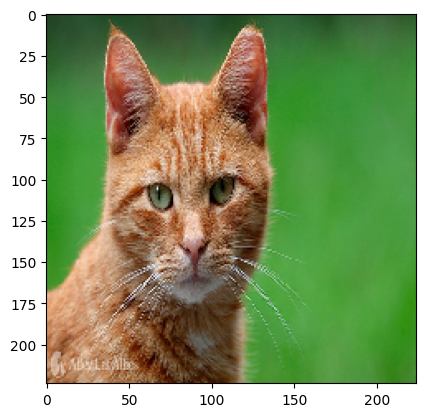

In [15]:
plt.imshow(cat_image_original)

In [16]:
# Get the predictions by the model
predictions = vgg16_model.predict(cat_image_preprocessed)

1/1 [==============================] - 4s 4s/step


In [17]:
# There are 1000 predictions
predictions.shape

(1, 1000)

In [20]:
# Get the predictions with the highest probabilities
predicted_class = decode_predictions(predictions, top=1)

35363/35363 [==============================] - 0s 0us/step


In [21]:
predicted_class

[[('n02123159', 'tiger_cat', 0.6083675)]]

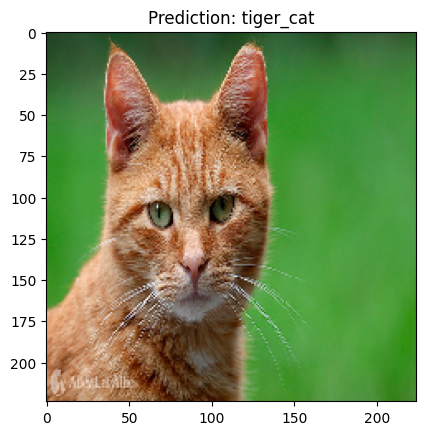

In [22]:
# Show the image along with the predicted class
plt.imshow(cat_image_original)
predicted_class_name = predicted_class[0][0][1]
_ = plt.title("Prediction: " + predicted_class_name)